In [ ]:
!pip install pandas numpy scikit-learn matplotlib seaborn

ERROR: Operation cancelled by user


In [1]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier


Dados nulos:
 X             0
Y             0
Z             0
Estado        0
status.1    278
dtype: int64

Quantidade de dados após augmentation:
Estado
0    738
2    618
1    312
Name: count, dtype: int64

===== KNN =====
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       222
           1       0.83      0.84      0.84        94
           2       0.92      0.91      0.92       185

    accuracy                           0.94       501
   macro avg       0.92      0.92      0.92       501
weighted avg       0.94      0.94      0.94       501



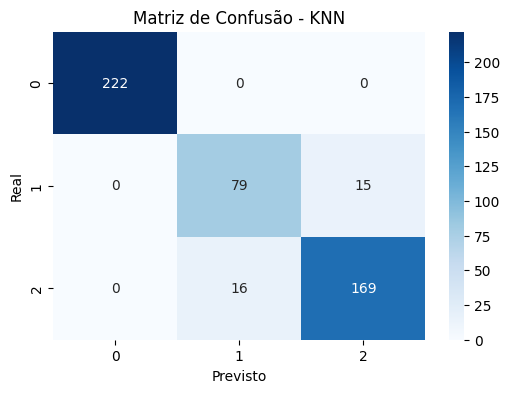


===== Naive Bayes =====
              precision    recall  f1-score   support

           0       0.59      0.55      0.57       222
           1       0.61      0.37      0.46        94
           2       0.47      0.59      0.52       185

    accuracy                           0.53       501
   macro avg       0.56      0.51      0.52       501
weighted avg       0.55      0.53      0.53       501



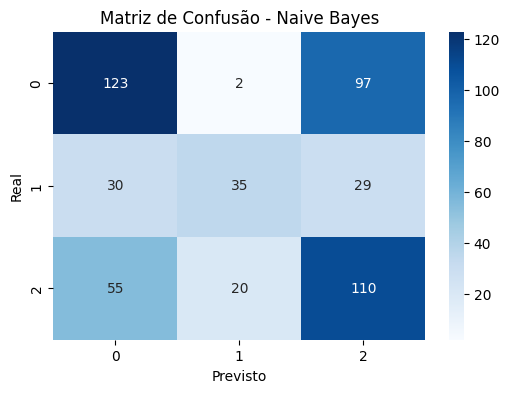


===== Rede Neural MLP =====


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


              precision    recall  f1-score   support

           0       0.97      0.90      0.93       222
           1       0.84      1.00      0.91        94
           2       0.88      0.87      0.87       185

    accuracy                           0.91       501
   macro avg       0.90      0.92      0.91       501
weighted avg       0.91      0.91      0.91       501



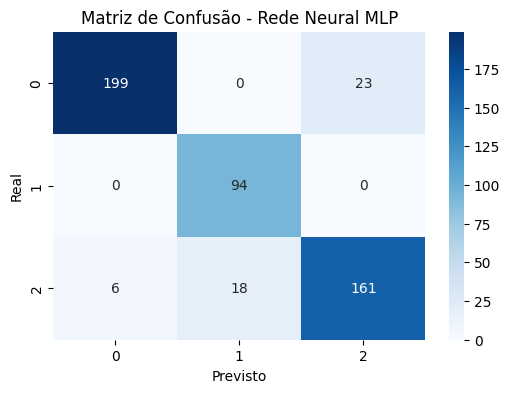


===== Random Forest =====
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       222
           1       0.84      0.87      0.85        94
           2       0.93      0.91      0.92       185

    accuracy                           0.94       501
   macro avg       0.92      0.93      0.93       501
weighted avg       0.94      0.94      0.94       501



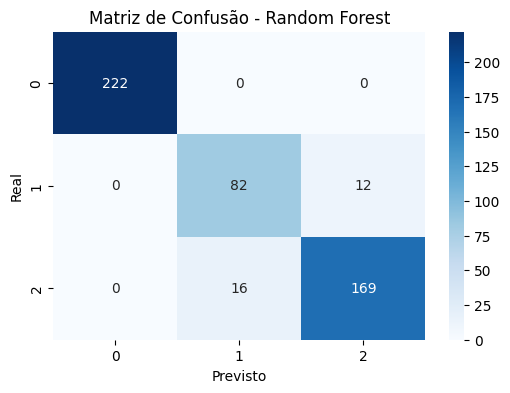

In [3]:
# Bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando o dataset
df = pd.read_csv('/content/feeds.csv', sep=';')

# Renomear colunas
df = df.rename(columns={
    'field1': 'X',
    'field2': 'Y',
    'field3': 'Z',
    'field4': 'Tempo',
    'status': 'Estado'
})

# Remover colunas desnecessárias
df = df.drop(columns=['longitude', 'elevation', 'created_at', 'entry_id', 'Tempo'], errors='ignore')

# Verificar dados nulos
print("Dados nulos:\n", df.isnull().sum())

# Conversão dos dados para float
df[['X', 'Y', 'Z']] = df[['X', 'Y', 'Z']].astype(float)

# ======== Data Augmentation ========

def add_noise(data, noise_level=0.02):
    noise = np.random.normal(0, noise_level, data.shape)
    return data + noise

# Número de vezes que o dataset será aumentado
n_augment = 5  # 3 vezes mais dados

# Separar features e target
X_original = df[['X', 'Y', 'Z']]
y_original = df['Estado']

# Lista para armazenar dados aumentados
augmented_features = [X_original]
augmented_labels = [y_original]

# Gerar dados com ruído
for _ in range(n_augment):
    noisy = add_noise(X_original, noise_level=0.02)
    augmented_features.append(pd.DataFrame(noisy, columns=['X', 'Y', 'Z']))
    augmented_labels.append(y_original)

# Concatenar dados originais com os aumentados
X_total = pd.concat(augmented_features, ignore_index=True)
y_total = pd.concat(augmented_labels, ignore_index=True)

print("\nQuantidade de dados após augmentation:")
print(y_total.value_counts())

# ======== Modelagem ========

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_total, y_total, test_size=0.3, random_state=42, stratify=y_total)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Lista de modelos
modelos = {
    "KNN": KNeighborsClassifier(n_neighbors=1),
    "Naive Bayes": GaussianNB(),
    "Rede Neural MLP": MLPClassifier(
    hidden_layer_sizes=(20, 10),
    max_iter=1000,
    activation='relu',
    solver='lbfgs',
    random_state=42
),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# ======== Avaliação ========
for nome, modelo in modelos.items():
    print(f"\n===== {nome} =====")
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    # Relatório de classificação
    print(classification_report(y_test, y_pred))

    # Matriz de Confusão
    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.title(f'Matriz de Confusão - {nome}')
    plt.show()


In [ ]:
# Visualizando os 5 primeiros registros
print(df.head())

print(f"\nO dataset possui {df.shape[0]} linhas.")

print(f"\nQuantidade de dados após\naugmentation: {y_total.shape[0]} linhas ")

print(y_total.value_counts())







        X        Y       Z  Estado  status.1
0   972.0  14944.0  6564.0       0       NaN
1   888.0  14120.0  7612.0       0       NaN
2  2744.0  15416.0  7860.0       0       NaN
3  1780.0  14040.0  7124.0       0       NaN
4  1476.0  14940.0  6072.0       0       NaN

O dataset possui 278 linhas.

Quantidade de dados após
augmentation: 1668 linhas 
Estado
0    738
2    618
1    312
Name: count, dtype: int64
